<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
# 4. magic to enable retina (high resolution) plots
# https://gist.github.com/minrk/3301035
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

import os
import shap
import time
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# change default style figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

# prevent scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

%watermark -a 'Ethen' -d -t -v -p numpy,pandas,sklearn,matplotlib

/Users/mingyuliu/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


Ethen 2020-03-25 20:11:00 

CPython 3.6.4
IPython 7.9.0

numpy 1.16.5
pandas 0.25.0
sklearn 0.21.2
matplotlib 3.1.1


In [6]:
data = pd.read_csv('heart.csv')
print(data.shape)
data.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [46]:
??shap.datasets.nhanesi

In [44]:
X, y = shap.datasets.nhanesi()
X_display, y_display = shap.datasets.nhanesi(display=True) # human readable feature values
print(X_display.shape)
X_display.head()

(9932, 19)


,Unnamed: 0,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
0,0,35.000,92.000,126.000,2.000,77.700,12.000,5.000,165.000,135.000,1.370,7.600,Female,142.000,323.000,41.800,5.800,31.109,50.000
1,1,71.000,78.000,210.000,2.000,77.700,37.000,4.000,298.000,89.000,1.380,6.400,Female,156.000,331.000,26.900,5.300,32.363,78.000
2,2,74.000,86.000,999.000,2.000,77.700,31.000,3.800,222.000,115.000,1.370,7.400,Female,170.000,299.000,38.500,8.100,25.388,84.000
3,3,64.000,92.000,385.000,1.000,77.700,30.000,4.300,265.000,94.000,1.970,7.300,Female,172.000,349.000,26.900,6.700,26.447,80.000
4,4,32.000,70.000,183.000,2.000,77.700,18.000,5.000,203.000,192.000,1.350,7.300,Male,128.000,386.000,49.700,8.100,20.355,58.000


In [45]:
y_display

array([ 15.27465753,  11.58607306,   8.14908676, ..., -18.87716895,
       -19.68310502,  17.93858447])

In [38]:
num_cols = [
    'Age', 'Diastolic BP', 'Poverty index', 'Race',
    'Red blood cells', 'Sedimentation rate', 'Serum Albumin',
    'Serum Cholesterol', 'Serum Iron', 'Serum Magnesium', 'Serum Protein',
    'Sex', 'Systolic BP', 'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure'
]

Index(['Unnamed: 0', 'Age', 'Diastolic BP', 'Poverty index', 'Race',
       'Red blood cells', 'Sedimentation rate', 'Serum Albumin',
       'Serum Cholesterol', 'Serum Iron', 'Serum Magnesium', 'Serum Protein',
       'Sex', 'Systolic BP', 'TIBC', 'TS', 'White blood cells', 'BMI',
       'Pulse pressure'],
      dtype='object')

In [ ]:
data = X_display[num_cols]
label = df_rossi[label_col].values

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=1234)

In [21]:
from lifelines.datasets import load_rossi

df_rossi = load_rossi()
print(df_rossi.shape)
df_rossi.head()

(432, 9)


,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [22]:
label_col = 'arrest'
num_cols = ['week', 'fin', 'age', 'race', 'wexp', 'mar', 'paro', 'prio']

In [23]:
df_rossi[label_col].value_counts() / df_rossi.shape[0]

0   0.736
1   0.264
Name: arrest, dtype: float64

In [25]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(df_rossi, duration_col='week', event_col='arrest')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 observations, 318 censored>
      duration col = 'week'
         event col = 'arrest'
number of subjects = 432
  number of events = 114
    log-likelihood = -658.75
  time fit was run = 2020-03-26 17:04:54 UTC

---
      coef  exp(coef)  se(coef)     z      p  -log2(p)  lower 0.95  upper 0.95
fin  -0.38       0.68      0.19 -1.98   0.05      4.40       -0.75       -0.00
age  -0.06       0.94      0.02 -2.61   0.01      6.79       -0.10       -0.01
race  0.31       1.37      0.31  1.02   0.31      1.70       -0.29        0.92
wexp -0.15       0.86      0.21 -0.71   0.48      1.06       -0.57        0.27
mar  -0.43       0.65      0.38 -1.14   0.26      1.97       -1.18        0.31
paro -0.08       0.92      0.20 -0.43   0.66      0.59       -0.47        0.30
prio  0.09       1.10      0.03  3.19 <0.005      9.48        0.04        0.15
---
Concordance = 0.64
Likelihood ratio test = 33.27 on 7 df, -log2(p)=15.37


In [30]:
data = df_rossi[num_cols]
label = df_rossi[label_col].values

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=1234)

In [31]:
dmatrix_full =  xgb.DMatrix(data, label=label)

# create a train/test split
dmatrix_train = xgb.DMatrix(X_train, label=y_train)
dmatrix_test = xgb.DMatrix(X_test, label=y_test)

In [32]:
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

# create a train/test split
dmatrix_train_censored = xgb.DMatrix(X_train, label=y_train)
dmatrix_test_censored = xgb.DMatrix(X_test, label=y_test)

In [37]:
params = {
    "eta": 0.1,
    "max_depth": 5,
    "objective": "survival:cox",
    "subsample": 0.9
}
evals = [(dmatrix_train_censored, 'train'), (dmatrix_test_censored, 'test')]
cox_model = xgb.train(params, dmatrix_train_censored, 100, evals=evals, verbose_eval=10)
cox_model.predict(dmatrix_train_censored)[:5]

[0]	train-cox-nloglik:5.38682	test-cox-nloglik:4.05926
[10]	train-cox-nloglik:4.63958	test-cox-nloglik:3.51553
[20]	train-cox-nloglik:4.59654	test-cox-nloglik:3.56142
[30]	train-cox-nloglik:4.60007	test-cox-nloglik:3.58321
[40]	train-cox-nloglik:4.60176	test-cox-nloglik:3.58287
[50]	train-cox-nloglik:4.60693	test-cox-nloglik:3.5871
[60]	train-cox-nloglik:4.61169	test-cox-nloglik:3.59116
[70]	train-cox-nloglik:4.61526	test-cox-nloglik:3.59248
[80]	train-cox-nloglik:4.61818	test-cox-nloglik:3.60025
[90]	train-cox-nloglik:4.61827	test-cox-nloglik:3.60014
[99]	train-cox-nloglik:4.62135	test-cox-nloglik:3.60558


array([  3550.8965,   1634.7938, 182560.47  ,   1164.1359,    816.8335],
      dtype=float32)

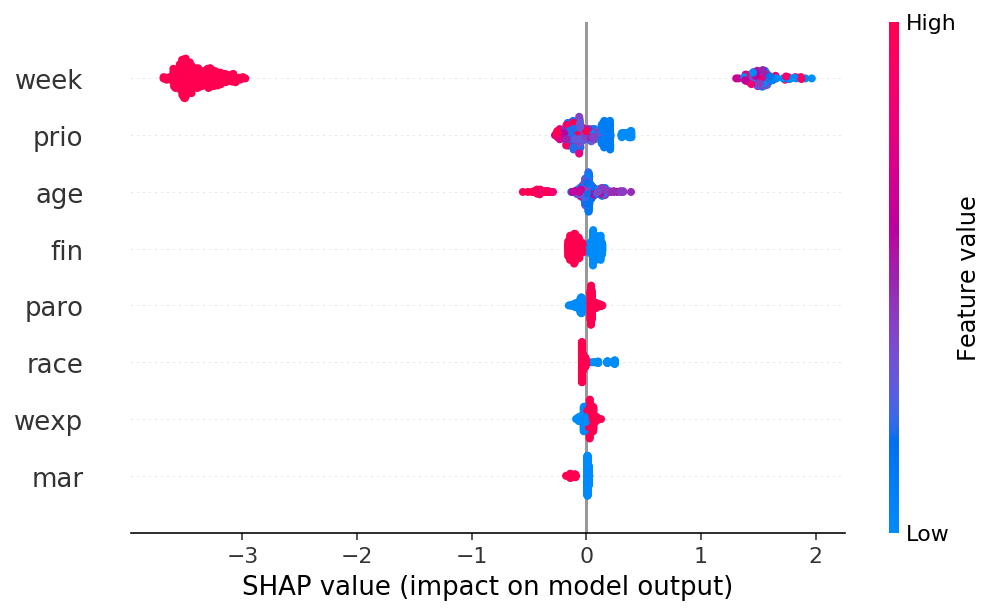

In [38]:
shap_values = shap.TreeExplainer(cox_model).shap_values(data)
shap.summary_plot(shap_values, data)

In [42]:
params = {
    "eta": 0.01,
    "max_depth": 5,
    "objective": "binary:logistic",
    "subsample": 0.9
}
evals = [(dmatrix_train, 'train'), (dmatrix_test, 'test')]
binary_model = xgb.train(params, dmatrix_train, 100, evals=evals, verbose_eval=10)
binary_model.predict(dmatrix_full)[:5]

[0]	train-error:0.005797	test-error:0.022989
[10]	train-error:0.005797	test-error:0.022989
[20]	train-error:0.005797	test-error:0.022989
[30]	train-error:0.005797	test-error:0.022989
[40]	train-error:0.005797	test-error:0.022989
[50]	train-error:0.005797	test-error:0.022989
[60]	train-error:0.005797	test-error:0.022989
[70]	train-error:0.005797	test-error:0.022989
[80]	train-error:0.005797	test-error:0.022989
[90]	train-error:0.005797	test-error:0.022989
[99]	train-error:0.005797	test-error:0.022989


array([0.9206191 , 0.9206191 , 0.9206191 , 0.07679935, 0.07990362],
      dtype=float32)

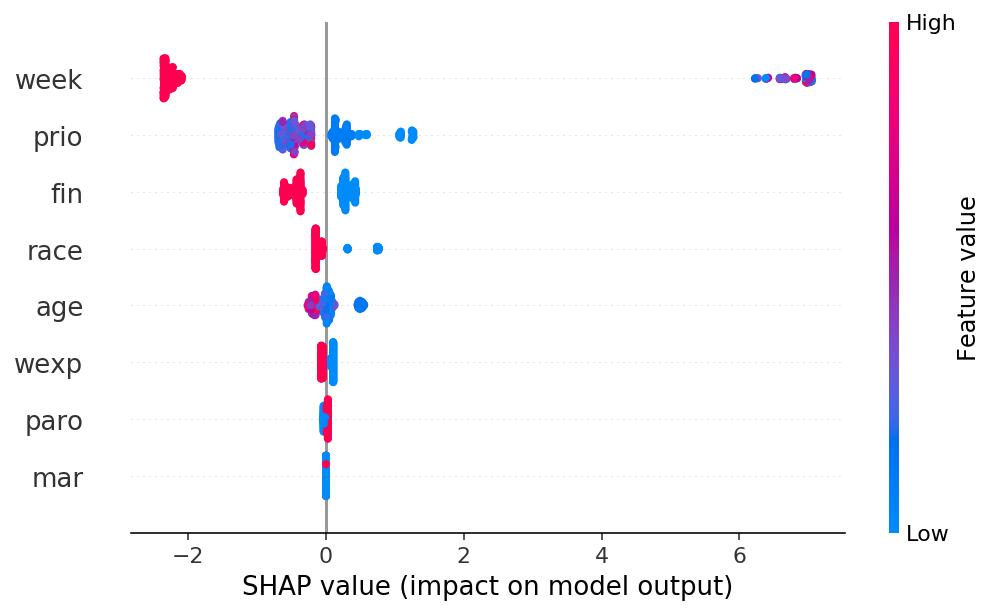

In [18]:
shap_values = shap.TreeExplainer(binary_model).shap_values(data)
shap.summary_plot(shap_values, data)

In [19]:
import sklearn.metrics as metrics

def compute_score(y_true, y_score, verbose=True, round_digits=3):
    
    auc = round(metrics.roc_auc_score(y_true, y_score), round_digits)
    log_loss = round(metrics.log_loss(y_true, y_score), round_digits)

    precision, recall, threshold = metrics.precision_recall_curve(y_true, y_score)
    f1 = 2 * (precision * recall) / (precision + recall)

    mask = ~np.isnan(f1)
    f1 = f1[mask]
    precision = precision[mask]
    recall = recall[mask]

    best_index = np.argmax(f1)
    threshold = round(threshold[best_index], round_digits)
    precision = round(precision[best_index], round_digits)
    recall = round(recall[best_index], round_digits)
    f1 = round(f1[best_index], round_digits)

    if verbose:
        print('auc: ', auc)
        print('threshold: ', threshold)
        print('precision: ', precision)
        print('recall: ', recall)
        print('f1: ', f1)

    return {
        'auc': auc,
        'threshold': threshold,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'log_loss': log_loss
    }

In [20]:
y_score = binary_model.predict(dmatrix_full)
compute_score(label, y_score)

auc:  0.988
threshold:  0.111
precision:  1.0
recall:  0.974
f1:  0.987


{'auc': 0.988,
 'threshold': 0.111,
 'precision': 1.0,
 'recall': 0.974,
 'f1': 0.987,
 'log_loss': 0.048}